In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

## Task definition -

The goal is to predict the player rating ("Overall" field) by using other player attributes as well as to understand which of these attributes affects the player rating the most.

## Cleaning the data

* Read the data.
* Select the required features and discard the irrelevant features.
* Clean the relevant features.

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813

In [3]:
# clean data

# y = Overall

# Rating vs age
# Rating vs Position
# clubs with highest skilled players
# correlation between ys and other attributes

#### **Selecting relevant columns**

We discard irrelevant columns such as "Flag", "Club Logo", etc. There are a lot of columns related to the position of a player on the field (Ex: LS, ST, RS, CF, etc.). These values represent the rating of a player at each position. For example, Messi has a high rating in forward positions and a lower rating when playing in a defensive position. These columns are mostly there to help place the players in the correct position in the field (Ex: you wouldn't want messi in a defensive position). Since our task deals with predicting the rating of a player, these columns aren't useful to our task and we drop them.

We believe that any player, regardless of nationality can reach any skill level. Hence, although we retain certain columns such as "Nationality" "Club", we don't use these to predict the rating as this may result in a biased model.

The following columns rate various skills of a player. Every column contains a value between 0 to 100 with 0 being the lowest rating and 100 being the highest rating.

```
skills = [ 'Crossing', 'Finishing', 'HeadingAccuracy', 
       'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
```

The following attributes are also used to predict the rating. 'Position' is the players position on the field.

```
xs = [ 'Position', 'Age', 'Height', 'Weight' ]
```

The following column provides the rating of the player. This is what we're trying to predict

```
y = 'Overall'
```

The below fields are kept but aren't used in the prediction. They may be used to interpret the results.

```
extras = ['ID', 'Name',  'Nationality', 'Club']
```

In [4]:
extras = ['ID', 'Name',  'Nationality', 'Club']

y = 'Overall'

xs = [ 'Position', 'Age', 'Height', 'Weight' ]

skills = [ 'Crossing', 'Finishing', 'HeadingAccuracy', 
       'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

all_cols = extras + xs + [y] + skills
len(all_cols)

43

In [5]:
# we keep only the selected columns and drop everything else
df = df[all_cols]
df

,ID,Name,Nationality,Club,Position,Age,Height,Weight,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,Argentina,FC Barcelona,RF,31,5'7,159lbs,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,ST,33,6'2,183lbs,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,LW,26,5'9,150lbs,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,Spain,Manchester United,GK,27,6'4,168lbs,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,Belgium,Manchester City,RCM,27,5'11,154lbs,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,England,Crewe Alexandra,CM,19,5'9,134lbs,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,243165,N. Christoffersson,Sweden,Trelleborgs FF,ST,19,6'3,170lbs,47,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,241638,B. Worman,England,Cambridge United,ST,16,5'8,148lbs,47,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,246268,D. Walker-Rice,England,Tranmere Rovers,RW,17,5'10,154lbs,47,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


#### **Handling missing data**

We check each column to see if we have missing data

In [6]:
ser = df.isna().sum()
ser = ser.sort_values()
for i in range(len(ser)):
    print(ser.index[i], '\t\t', ser.iloc[i])

ID 		 0
Name 		 0
Nationality 		 0
Age 		 0
Overall 		 0
Jumping 		 48
Stamina 		 48
Strength 		 48
LongShots 		 48
Aggression 		 48
Interceptions 		 48
Positioning 		 48
Vision 		 48
Composure 		 48
ShotPower 		 48
Marking 		 48
StandingTackle 		 48
SlidingTackle 		 48
GKDiving 		 48
GKHandling 		 48
GKKicking 		 48
Penalties 		 48
Balance 		 48
Agility 		 48
GKPositioning 		 48
Height 		 48
Weight 		 48
Crossing 		 48
Finishing 		 48
HeadingAccuracy 		 48
Reactions 		 48
Volleys 		 48
ShortPassing 		 48
Curve 		 48
FKAccuracy 		 48
LongPassing 		 48
BallControl 		 48
Acceleration 		 48
SprintSpeed 		 48
Dribbling 		 48
GKReflexes 		 48
Position 		 60
Club 		 241


We try dropping all the rows with missing data.

In [7]:
df = df.dropna()
df.shape

(17918, 43)

In [8]:
18207 - 17918

289

We end up dropping 289 rows. This seems reasonable given that we still have plenty of data to work with.

#### **Feature engineering and cleaning**

The following tasks need to be completed - 

1. Position - this can be reduced to just "Forward", "Middle", "Defense", and "Goalkeeper" and encode it numerically.
2. Height - needs to be converted from feet and inches to just feet.
3. Weight - the "lbs" at the end needs to be removed and the column needs to be converted to a floating point data type.

**Position**

The below picture explains the positions of players in a football field (Source - https://www.stack.com/a/the-soccer-positions-explained/)

![](./soccer-positions.webp)

In [9]:
sorted(df.Position.unique())

['CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

* Goalkeeper - "GK"
* Midfielder - anything ending with "M"
* Defense - anything ending with "B" ("SW" doesn't exist in our dataset)
* Forward - anything ending with "F", "S", "T", or "W"

In [10]:
def reduce_positions(pos):
    if pos == "GK":
        return "Goalkeeper"
    
    pos = pos.lower().strip()
    
    if pos.endswith("m"):
        return "Midfield"
    
    if pos.endswith("b"):
        return "Defense"
    
    if pos[-1] in ['f', 's', 't', 'w']:
        return "Forward"
    
    return None

In [11]:
df.loc[:, 'Position'] = df.Position.apply(reduce_positions)
df.Position.isna().sum()

C:\Users\geeth\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0

In [12]:
df.Position.value_counts()

Midfield      6764
Defense       5781
Forward       3381
Goalkeeper    1992
Name: Position, dtype: int64

We use one hot encoding to encode the positions since none of the values have any ordering.

In [13]:
pos_df = pd.get_dummies(df.Position)
df = pd.concat((df.drop(columns=['Position']), pos_df), axis=1)
df

,ID,Name,Nationality,Club,Age,Height,Weight,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Defense,Forward,Goalkeeper,Midfield
0,158023,L. Messi,Argentina,FC Barcelona,31,5'7,159lbs,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,1,0,0
1,20801,Cristiano Ronaldo,Portugal,Juventus,33,6'2,183lbs,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0,1,0,0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,26,5'9,150lbs,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0,1,0,0
3,193080,De Gea,Spain,Manchester United,27,6'4,168lbs,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,0,1,0
4,192985,K. De Bruyne,Belgium,Manchester City,27,5'11,154lbs,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,England,Crewe Alexandra,19,5'9,134lbs,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,0,0,0,1
18203,243165,N. Christoffersson,Sweden,Trelleborgs FF,19,6'3,170lbs,47,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,0,1,0,0
18204,241638,B. Worman,England,Cambridge United,16,5'8,148lbs,47,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,0,1,0,0
18205,246268,D. Walker-Rice,England,Tranmere Rovers,17,5'10,154lbs,47,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,0,1,0,0


**Height** 

We convert feet and inches to just feet. There are 12 inches in a feet. We divide the inches by 12 and add it to the feet.

In [14]:
# verifying that all heights have the same format
df.Height.value_counts()

6'0     2837
5'10    2452
5'9     2203
5'11    2132
6'2     1990
6'1     1886
6'3      975
5'8      934
5'7      892
6'4      741
5'6      311
6'5      241
5'5      144
6'6       91
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

In [15]:
def convert_to_feet(val):
    val = val.split("'")
    return float(val[0]) + (float(val[1]) / 12.0)

In [16]:
df.loc[:, 'Height'] = df.Height.apply(convert_to_feet)
df.Height

0        5.583333
1        6.166667
2        5.750000
3        6.333333
4        5.916667
           ...   
18202    5.750000
18203    6.250000
18204    5.666667
18205    5.833333
18206    5.833333
Name: Height, Length: 17918, dtype: float64

**Weight**

Removing "lbs" from the Weight column

In [17]:
df.Weight.str.endswith('lbs').sum(), df.shape[0]

(17918, 17918)

All values end with "lbs". Hence, we can just remove the last 3 characters.

In [18]:
df.loc[:, 'Weight'] = df.Weight.str[:-3].astype('float32')
df.Weight

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 17918, dtype: float32

**Save preprocessed dataset** 

In [19]:
df.to_csv('preproc.csv', index=False)

### Modeling

In [20]:
df = pd.read_csv('preproc.csv')
df

,ID,Name,Nationality,Club,Age,Height,Weight,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Defense,Forward,Goalkeeper,Midfield
0,158023,L. Messi,Argentina,FC Barcelona,31,5.583333,159.0,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,1,0,0
1,20801,Cristiano Ronaldo,Portugal,Juventus,33,6.166667,183.0,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0,1,0,0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,26,5.750000,150.0,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0,1,0,0
3,193080,De Gea,Spain,Manchester United,27,6.333333,168.0,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,0,1,0
4,192985,K. De Bruyne,Belgium,Manchester City,27,5.916667,154.0,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,238813,J. Lundstram,England,Crewe Alexandra,19,5.750000,134.0,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,0,0,0,1
17914,243165,N. Christoffersson,Sweden,Trelleborgs FF,19,6.250000,170.0,47,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,0,1,0,0
17915,241638,B. Worman,England,Cambridge United,16,5.666667,148.0,47,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,0,1,0,0
17916,246268,D. Walker-Rice,England,Tranmere Rovers,17,5.833333,154.0,47,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,0,1,0,0


In [21]:
extras = ['ID', 'Name',  'Nationality', 'Club']

y = 'Overall'

skills = [ 'Crossing', 'Finishing', 'HeadingAccuracy', 
       'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

xs = [ 'Defense', 'Forward', 'Goalkeeper', 'Midfield', 'Age', 'Height', 'Weight' ] + skills

In [22]:
X = df[xs].astype('float32')
X

,Defense,Forward,Goalkeeper,Midfield,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0.0,1.0,0.0,0.0,31.0,5.583333,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,0.0,1.0,0.0,0.0,33.0,6.166667,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,0.0,1.0,0.0,0.0,26.0,5.750000,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0.0,0.0,1.0,0.0,27.0,6.333333,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,0.0,0.0,0.0,1.0,27.0,5.916667,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,0.0,0.0,0.0,1.0,19.0,5.750000,134.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
17914,0.0,1.0,0.0,0.0,19.0,6.250000,170.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
17915,0.0,1.0,0.0,0.0,16.0,5.666667,148.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
17916,0.0,1.0,0.0,0.0,17.0,5.833333,154.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [23]:
X = X.drop(columns=['Reactions'])
X.shape

(17918, 40)

In [24]:
y = df[y]
y

0        94
1        94
2        92
3        91
4        91
         ..
17913    47
17914    47
17915    47
17916    47
17917    46
Name: Overall, Length: 17918, dtype: int64

**Splitting the data into training, validation and test set**

We randomly split the dataset into train, validation, and test set in a 80-10-10 split.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2, random_state=5000)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14334, 40), (3584, 40), (14334,), (3584,))

In [27]:
X_test, X_val, y_test, y_val =  train_test_split(X_val, y_val, test_size=0.5, random_state=5000)
X_test.shape, X_val.shape, y_test.shape, y_val.shape

((1792, 40), (1792, 40), (1792,), (1792,))

Run the following to install pydotplus and graphviz (required for visualization of Decision Trees) - 

```
conda install graphviz
pip install pydotplus
```

In [28]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO 
import IPython.display as display
from PIL import Image

In [29]:
def tree_viz(model: 'Decision Tree model', 
             class_names: 'list(str) - list of label (class) names', 
             feature_names: 'list(str) - list of names of features of the independent variable', 
             out_fname:'if specified, graph is saved to this path'=None,rotate=False) -> Image:
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, class_names=class_names, 
     feature_names=feature_names, filled=True, rounded=True,
     special_characters=True, rotate=rotate)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    if out_fname:
        graph.write_png(out_fname)
    return display.Image(graph.create_png())

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import GridSearchCV

In [31]:
def eval_model(model, X_train, y_train, X_val, y_val):
    R2_train, R2_val = model.score(X_train, y_train), model.score(X_val, y_val)
    MSE_train, MSE_valid = np.sqrt(mean_squared_error(y_train, model.predict(X_train))), np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
    print(f'R2 train = {R2_train}')
    print(f'R2 validation = {R2_val}')
    print(f'sqrt(Mean Squared Error) train = {MSE_train}')
    print(f'sqrt(Mean Squared Error) validation  = {MSE_valid}')

We build a decision tree model because decision trees are very interpretable and don't require extra preprocessing such as feature scaling etc. Visualizing the tree can provide an interpretable, easy to use model that can be used by football managers in real life.

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
eval_model(model, X_train, y_train, X_val, y_val)

R2 train = 1.0
R2 validation = 0.8910659393691606
sqrt(Mean Squared Error) train = 0.0
sqrt(Mean Squared Error) validation  = 2.300038819548177


In [33]:
model.tree_.max_depth

28

We obtain a tree with very good performance. On average, we're off by around +- 2.26 from the correct player rating. We may be able to improve the performance with some hyperparameter tuning. The hyperparameters we consider are max_depth and max_features. max_depth controls the maximum depth of the tree whereas max_features controls the maximum number of features used by the tree (features that may cause the tree to overfit may be ignored).

In [34]:
# concatinating because grid search automatically performs 5 fold cross validation
X, y = pd.concat((X_train, X_val), axis=0), pd.concat((y_train, y_val), axis=0)
X.shape, y.shape

((16126, 40), (16126,))

In [35]:
def grid_search_tree(X, y, param_grid=None):
    param_grid = {'max_depth':range(4, 28, 2), 'max_features':[0.5, 0.6, 0.7,0.8,0.9,1.0]} if param_grid is None else param_grid
    gs = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), n_jobs=-1)
    gs.fit(X, y) 
    return gs.best_estimator_, gs.best_params_, np.sqrt(-gs.best_score_)

In [36]:
model, best_params, best_score = grid_search_tree(X, y)
model, best_params, best_score

(DecisionTreeRegressor(max_depth=12, max_features=0.8),
 {'max_depth': 12, 'max_features': 0.8},
 2.1741610063838417)

In [37]:
eval_model(model, X_train, y_train, X_val, y_val)

R2 train = 0.9601732293416533
R2 validation = 0.9647935386347256
sqrt(Mean Squared Error) train = 1.3777195308407262
sqrt(Mean Squared Error) validation  = 1.307568674474917


Achieves much better performance than our previous model and is on average within +- 1.36 of the correct rating. The best hyperparameters are - max_depth = 12 and max_features = 0.8.

**Hypothesis** - different player attributes likely determine the rating for players in different position. Ex: Forward players likely need more volley skills and positioning skills compared to goalkeepers or defensive players. Goalkeepers will find goal keeping related skills such as GKDiving, GKReflexes more important than volleying or dribbling. 

Hence, if we build a separate decision tree for players in different positions, this will likely lead to a more performant model as well as a more interpretable model.

In [38]:
def build_model_for_position(position, X, y, param_grid=None):
    all_positions = ['Defense', 'Forward', 'Goalkeeper', 'Midfield']
    X_filtered = X[X[position] == 1.0]
    y_filtered = y[X[position] == 1.0]
    X_filtered = X_filtered.drop(columns=all_positions)
    model, best_params, best_score = grid_search_tree(X_filtered, y_filtered, param_grid=param_grid)
    return {'model':model, 'params':best_params, 'score':best_score}

def build_model_for_all_positions(X, y, param_grid=None):
    all_positions = ['Defense', 'Forward', 'Goalkeeper', 'Midfield']
    res = {}
    for pos in all_positions:
        print(f'Building model for position = {pos}')
        res[pos] = build_model_for_position(pos, X, y, param_grid=param_grid)
        print(f'Model built. Results = ', res[pos], '\n\n')
    return res

In [39]:
res = build_model_for_all_positions(X, y)
res

Building model for position = Defense
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=10, max_features=1.0), 'params': {'max_depth': 10, 'max_features': 1.0}, 'score': 2.01003106167489} 


Building model for position = Forward
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=8, max_features=0.9), 'params': {'max_depth': 8, 'max_features': 0.9}, 'score': 2.0834214612344835} 


Building model for position = Goalkeeper
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=8, max_features=0.7), 'params': {'max_depth': 8, 'max_features': 0.7}, 'score': 1.6386720928970875} 


Building model for position = Midfield
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=8, max_features=1.0), 'params': {'max_depth': 8, 'max_features': 1.0}, 'score': 2.1166013360415086} 




{'Defense': {'model': DecisionTreeRegressor(max_depth=10, max_features=1.0),
  'params': {'max_depth': 10, 'max_features': 1.0},
  'score': 2.01003106167489},
 'Forward': {'model': DecisionTreeRegressor(max_depth=8, max_features=0.9),
  'params': {'max_depth': 8, 'max_features': 0.9},
  'score': 2.0834214612344835},
 'Goalkeeper': {'model': DecisionTreeRegressor(max_depth=8, max_features=0.7),
  'params': {'max_depth': 8, 'max_features': 0.7},
  'score': 1.6386720928970875},
 'Midfield': {'model': DecisionTreeRegressor(max_depth=8, max_features=1.0),
  'params': {'max_depth': 8, 'max_features': 1.0},
  'score': 2.1166013360415086}}

In [40]:
def position_model_predict(X, y, models):
    all_positions = ['Defense', 'Forward', 'Goalkeeper', 'Midfield']
    preds = []
    for pos in all_positions:
        X_filtered, y_filtered = X[X[pos] == 1.0], y[X[pos] == 1.0]
        X_filtered = X_filtered.drop(columns=all_positions)
        pr = pd.Series(models[pos]['model'].predict(X_filtered), index=X_filtered.index)
        preds.append(pr)
    preds = pd.concat(preds, axis=0).loc[X.index]
    return preds

In [41]:
np.sqrt(mean_squared_error(y_val, position_model_predict(X_val, y_val, res) ))

1.2563192311691436

We get further performance improvements using this model!

**Visualizing the models**

It is hard to visualize models with depth 6 or more on the notebook since they contain too many leaf nodes. Hence, we build and visualize shorter trees to understand the internal working of the model.

In [42]:
param_grid = {'max_depth':[4], 'max_features':[0.5, 0.6, 0.7,0.8,0.9,1.0]}
res = build_model_for_all_positions(X, y, param_grid=param_grid)
res

Building model for position = Defense
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=4, max_features=1.0), 'params': {'max_depth': 4, 'max_features': 1.0}, 'score': 2.5748722256890133} 


Building model for position = Forward
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=4, max_features=0.7), 'params': {'max_depth': 4, 'max_features': 0.7}, 'score': 2.5081280493276417} 


Building model for position = Goalkeeper
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=4, max_features=0.8), 'params': {'max_depth': 4, 'max_features': 0.8}, 'score': 2.0547664974060558} 


Building model for position = Midfield
Model built. Results =  {'model': DecisionTreeRegressor(max_depth=4, max_features=1.0), 'params': {'max_depth': 4, 'max_features': 1.0}, 'score': 2.786993999376104} 




{'Defense': {'model': DecisionTreeRegressor(max_depth=4, max_features=1.0),
  'params': {'max_depth': 4, 'max_features': 1.0},
  'score': 2.5748722256890133},
 'Forward': {'model': DecisionTreeRegressor(max_depth=4, max_features=0.7),
  'params': {'max_depth': 4, 'max_features': 0.7},
  'score': 2.5081280493276417},
 'Goalkeeper': {'model': DecisionTreeRegressor(max_depth=4, max_features=0.8),
  'params': {'max_depth': 4, 'max_features': 0.8},
  'score': 2.0547664974060558},
 'Midfield': {'model': DecisionTreeRegressor(max_depth=4, max_features=1.0),
  'params': {'max_depth': 4, 'max_features': 1.0},
  'score': 2.786993999376104}}

In [43]:
np.sqrt(mean_squared_error(y_val, position_model_predict(X_val, y_val, res) ))

2.5762525561703296

Slightly lower performance but still a very good model since it is on average within +-2.51 of the actual rating.

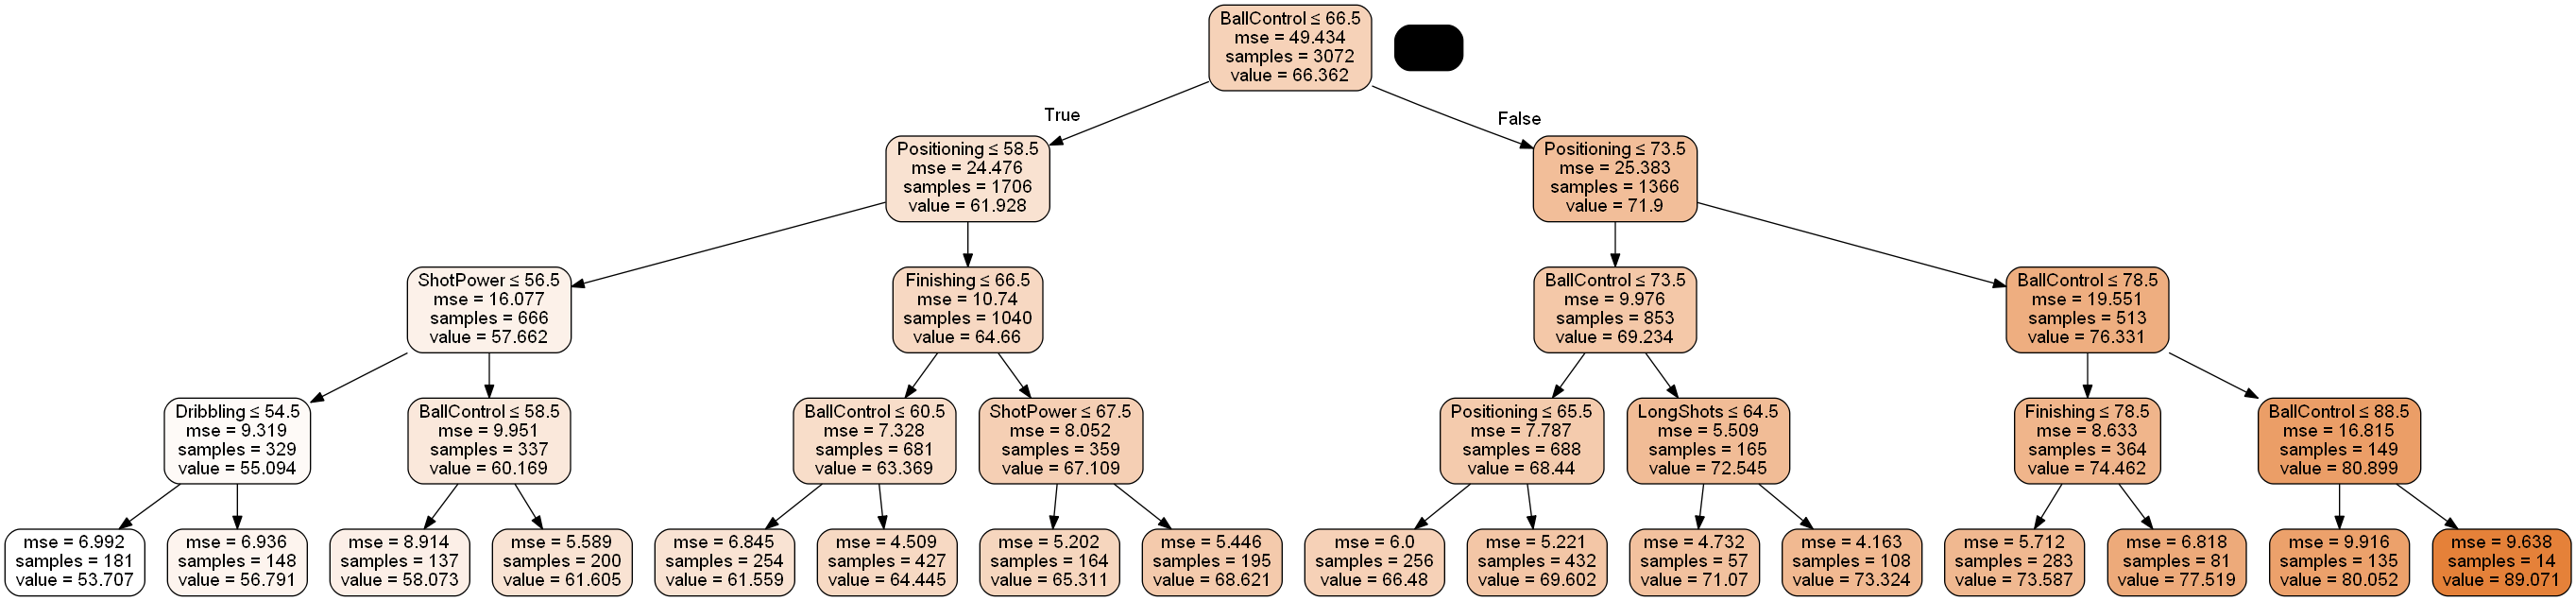

In [44]:
position = 'Forward'
model = res[position]['model']
tree_viz(model, None, X.columns[4:], f'tree_viz_{position}.png')

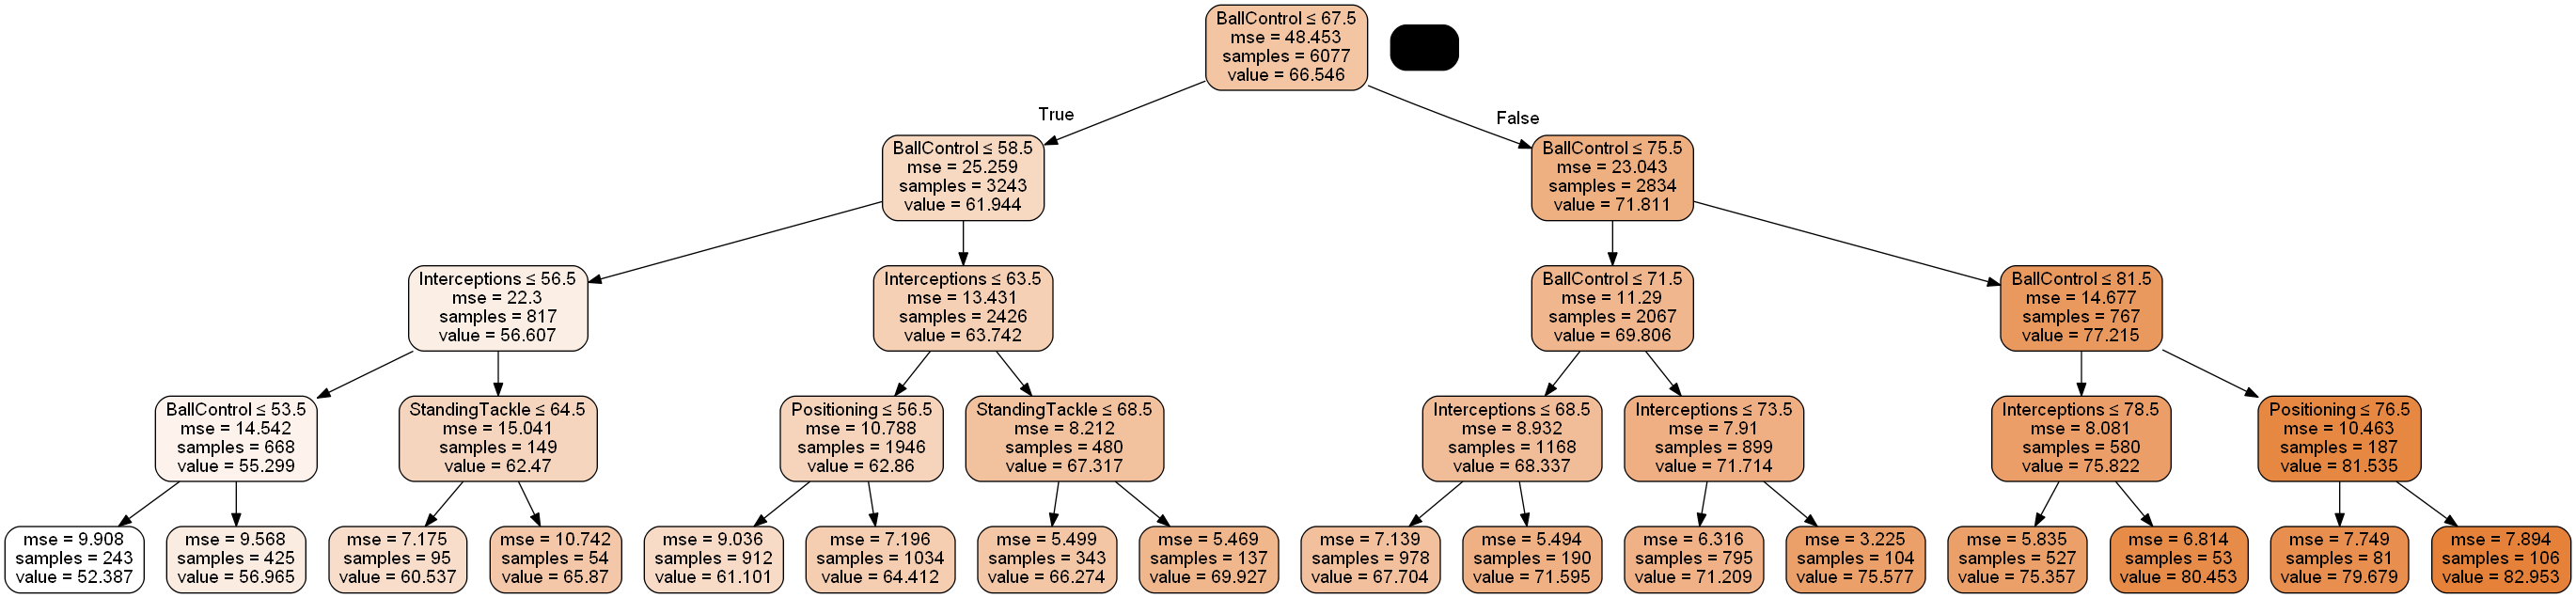

In [45]:
position = 'Midfield'
model = res[position]['model']
tree_viz(model, None, X.columns[4:], f'tree_viz_{position}.png')

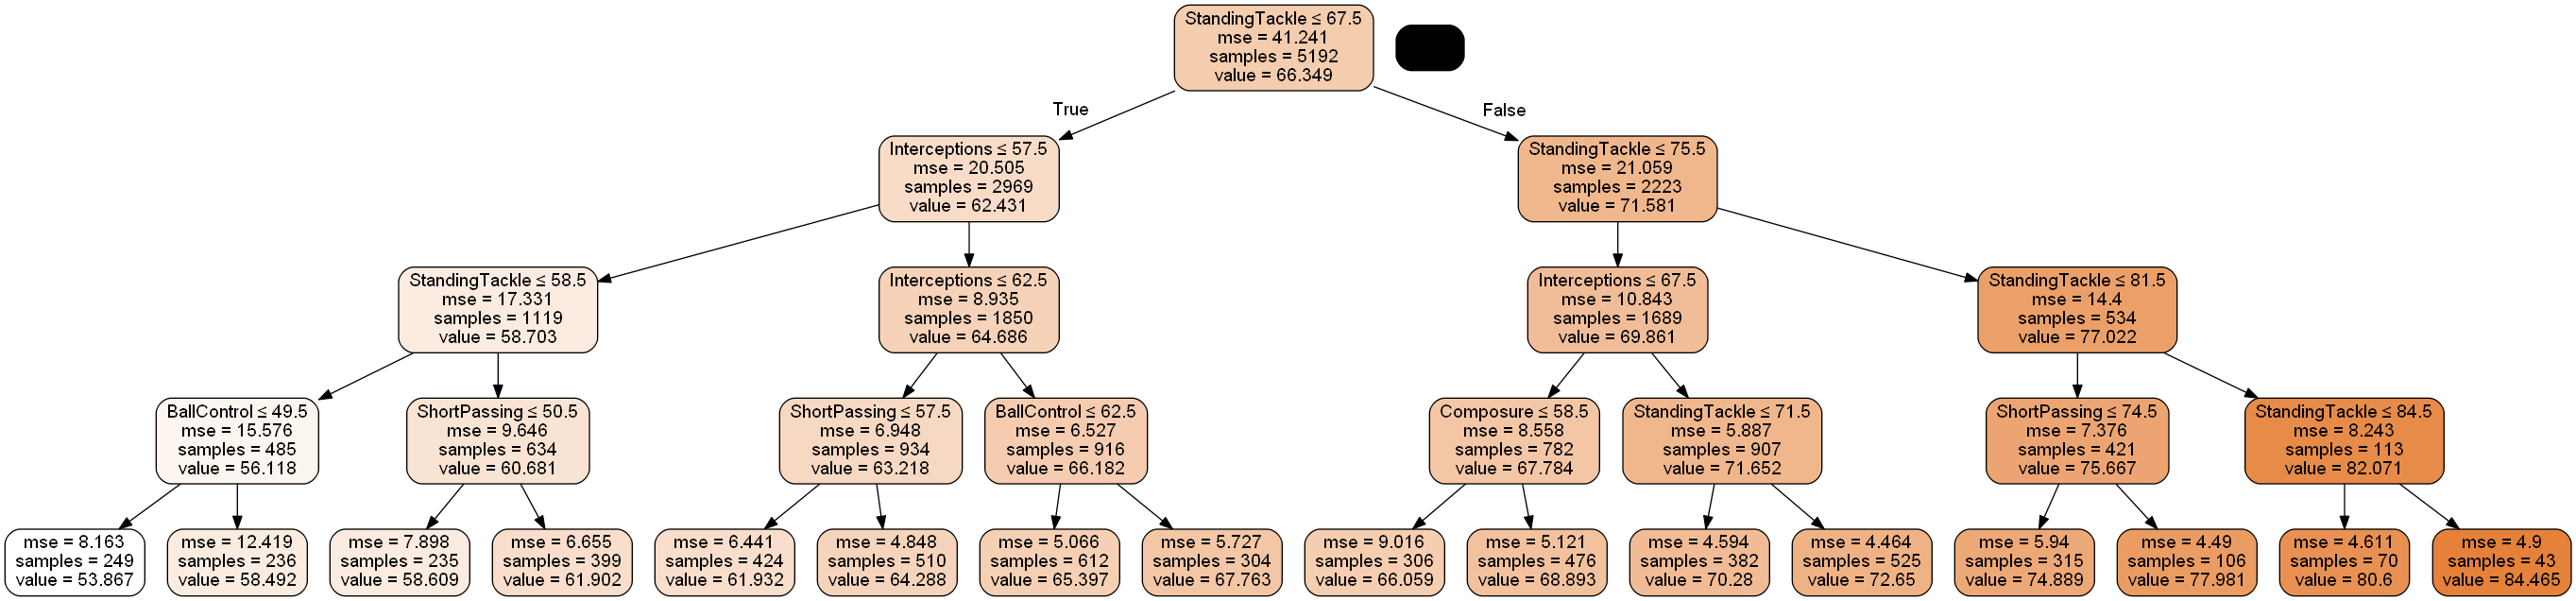

In [46]:
position = 'Defense'
model = res[position]['model']
tree_viz(model, None, X.columns[4:], f'tree_viz_{position}.png')

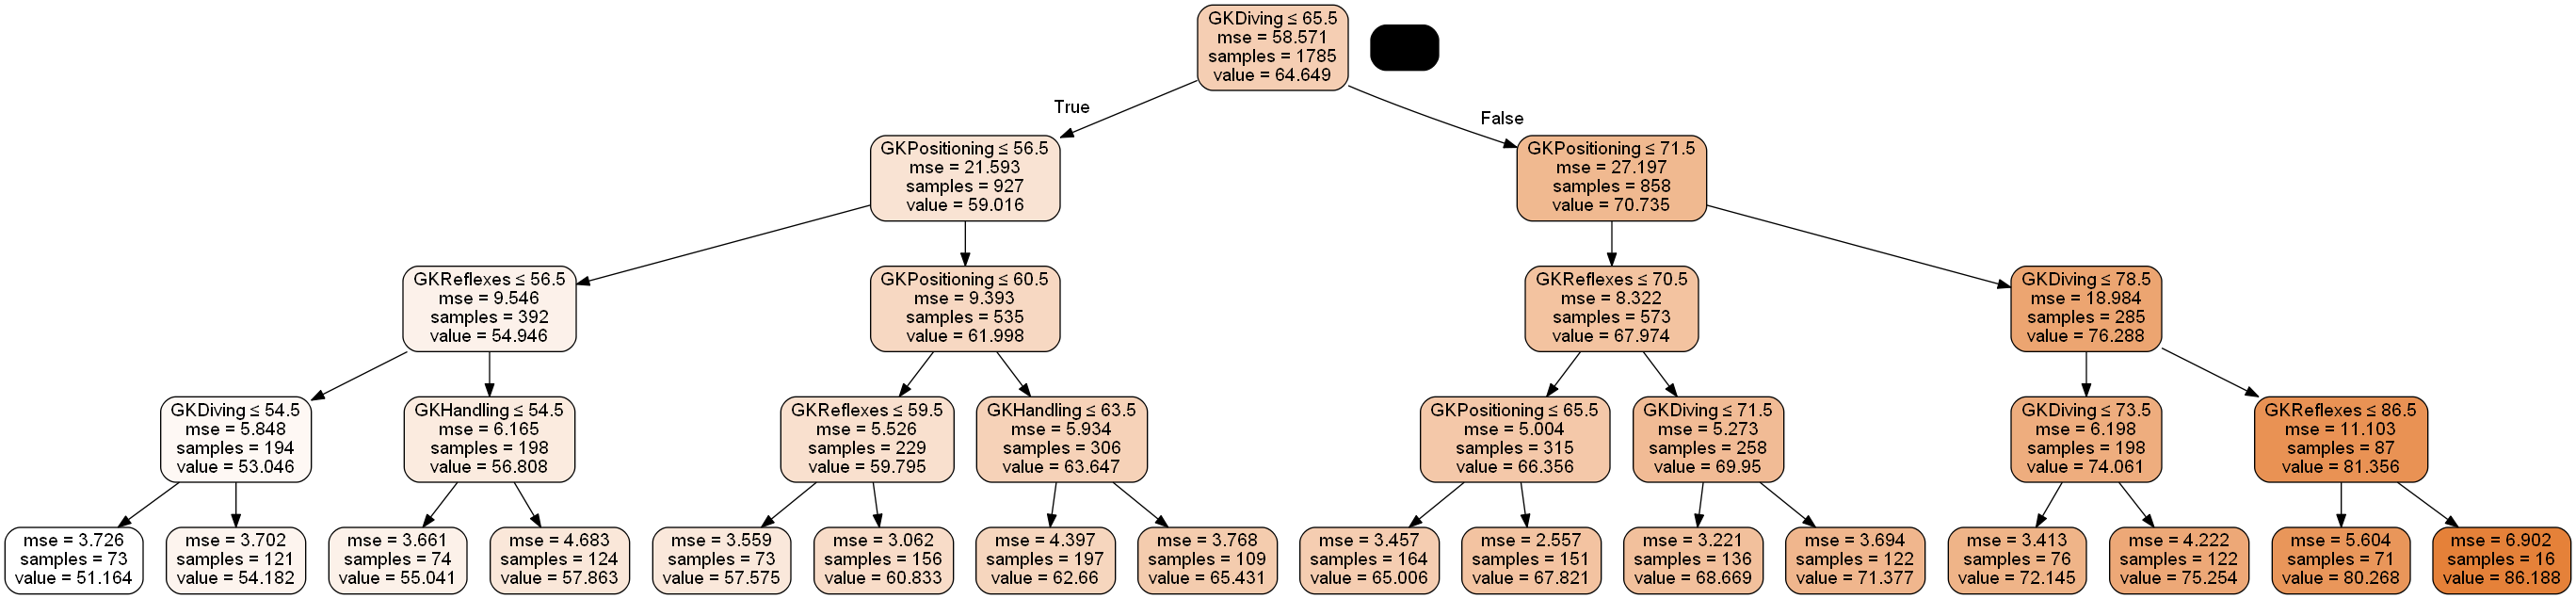

In [47]:
position = 'Goalkeeper'
model = res[position]['model']
tree_viz(model, None, X.columns[4:], f'tree_viz_{position}.png')

**Observations** 

The visualizations of the models **confirm our hypothesis** that players in different positions require different skills to have a high rating. 
* Players in Forward position require a combination of Positioning, BallControl, Finishing and ShotPower.
* Players in Midfield position require a combination of BallControl, Interceptions and Finishing.
* Players in Defense position require a combination of Interceptions, StandingTackle, SlidingTackle, Marking and ShortPassing.
* Players in Goalkeeper position require goalkeeper specific skills such as GKReflexes, GKDiving, and GKPositioning.

Building separate models for different positions also improves the performance of our rating prediction model.